# Import relevant modules

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## Create file object

In [2]:
file = '6. Categorical variables. Visualization techniques_exercise.xlsx'

In [3]:
xlsx = pd.ExcelFile(file)

## Display all Excel worksheet names in workbook

In [4]:
print("Worksheet Names:", xlsx.sheet_names)

Worksheet Names: ['Frequency distribution table', 'Bar chart', 'Pie chart', 'Pareto diagram']


## Textual data for analysis

In [5]:
text = r'You have sold 12,327 ice creams in New York; 17,129 in LA and 19,923 in San Francisco.'

## _Manually_ entering data from text into a dictionary

In [6]:
data_dict_manual = {'location': ['New York', 'LA', 'San Francisco'], 'quantity': [12327, 17129, 19923]}
print(data_dict_manual)

{'location': ['New York', 'LA', 'San Francisco'], 'quantity': [12327, 17129, 19923]}


## _Automatically_ extracting workable data from text using Regular Expressions

In [7]:
pattern = r'(?P<quantity>\d+(?:,\d{3})*)[\w\s]+in\s+(?P<location>([A-Z]+[a-z]+\s?)+|[A-Z]+)'
data_from_regex = re.finditer(pattern, text)

In [8]:
data_dict_regex = {'location': [], 'quantity': []}
for match in data_from_regex:
    data_dict_regex['location'].append(match.group('location'))
    data_dict_regex['quantity'].append(int(match.group('quantity').replace(',', '')))
print(data_dict_regex)

{'location': ['New York', 'LA', 'San Francisco'], 'quantity': [12327, 17129, 19923]}


## Convert the dictionary to a DataFrame

In [9]:
freq_dist_tbl = pd.DataFrame(data_dict_regex)
freq_dist_tbl.set_index('location', inplace=True)

## Exercise - Frequency distribution table

In [10]:
print(freq_dist_tbl)

               quantity
location               
New York          12327
LA                17129
San Francisco     19923


## Exercise - Bar chart

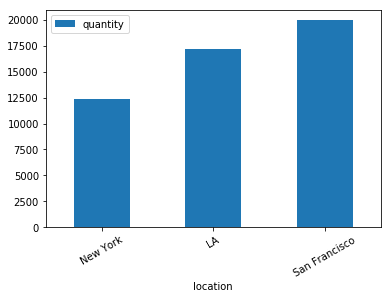

In [11]:
freq_dist_tbl.plot.bar(rot=30)

## Exercise - Pie chart - Task 1 - Add a column for relative frequency

In [12]:
freq_dist_tbl['relative_frequency'] = freq_dist_tbl['quantity'] / freq_dist_tbl['quantity'].sum()

In [13]:
print(freq_dist_tbl)

               quantity  relative_frequency
location                                   
New York          12327            0.249641
LA                17129            0.346888
San Francisco     19923            0.403471


## Exercise - Pie chart - Task 2 - Make a pie chart

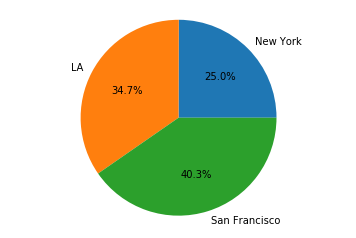

In [14]:
labels = list(freq_dist_tbl.index)
pct_of_co_sales = list(freq_dist_tbl['relative_frequency'])
fig2, ax1 = plt.subplots()
ax1.pie(pct_of_co_sales, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()